# <font size="+3" color=red ><b> <center><u>Student Performance Analysis, Visualization & Prediction</u></center></b></font><br><a id="top"></a>

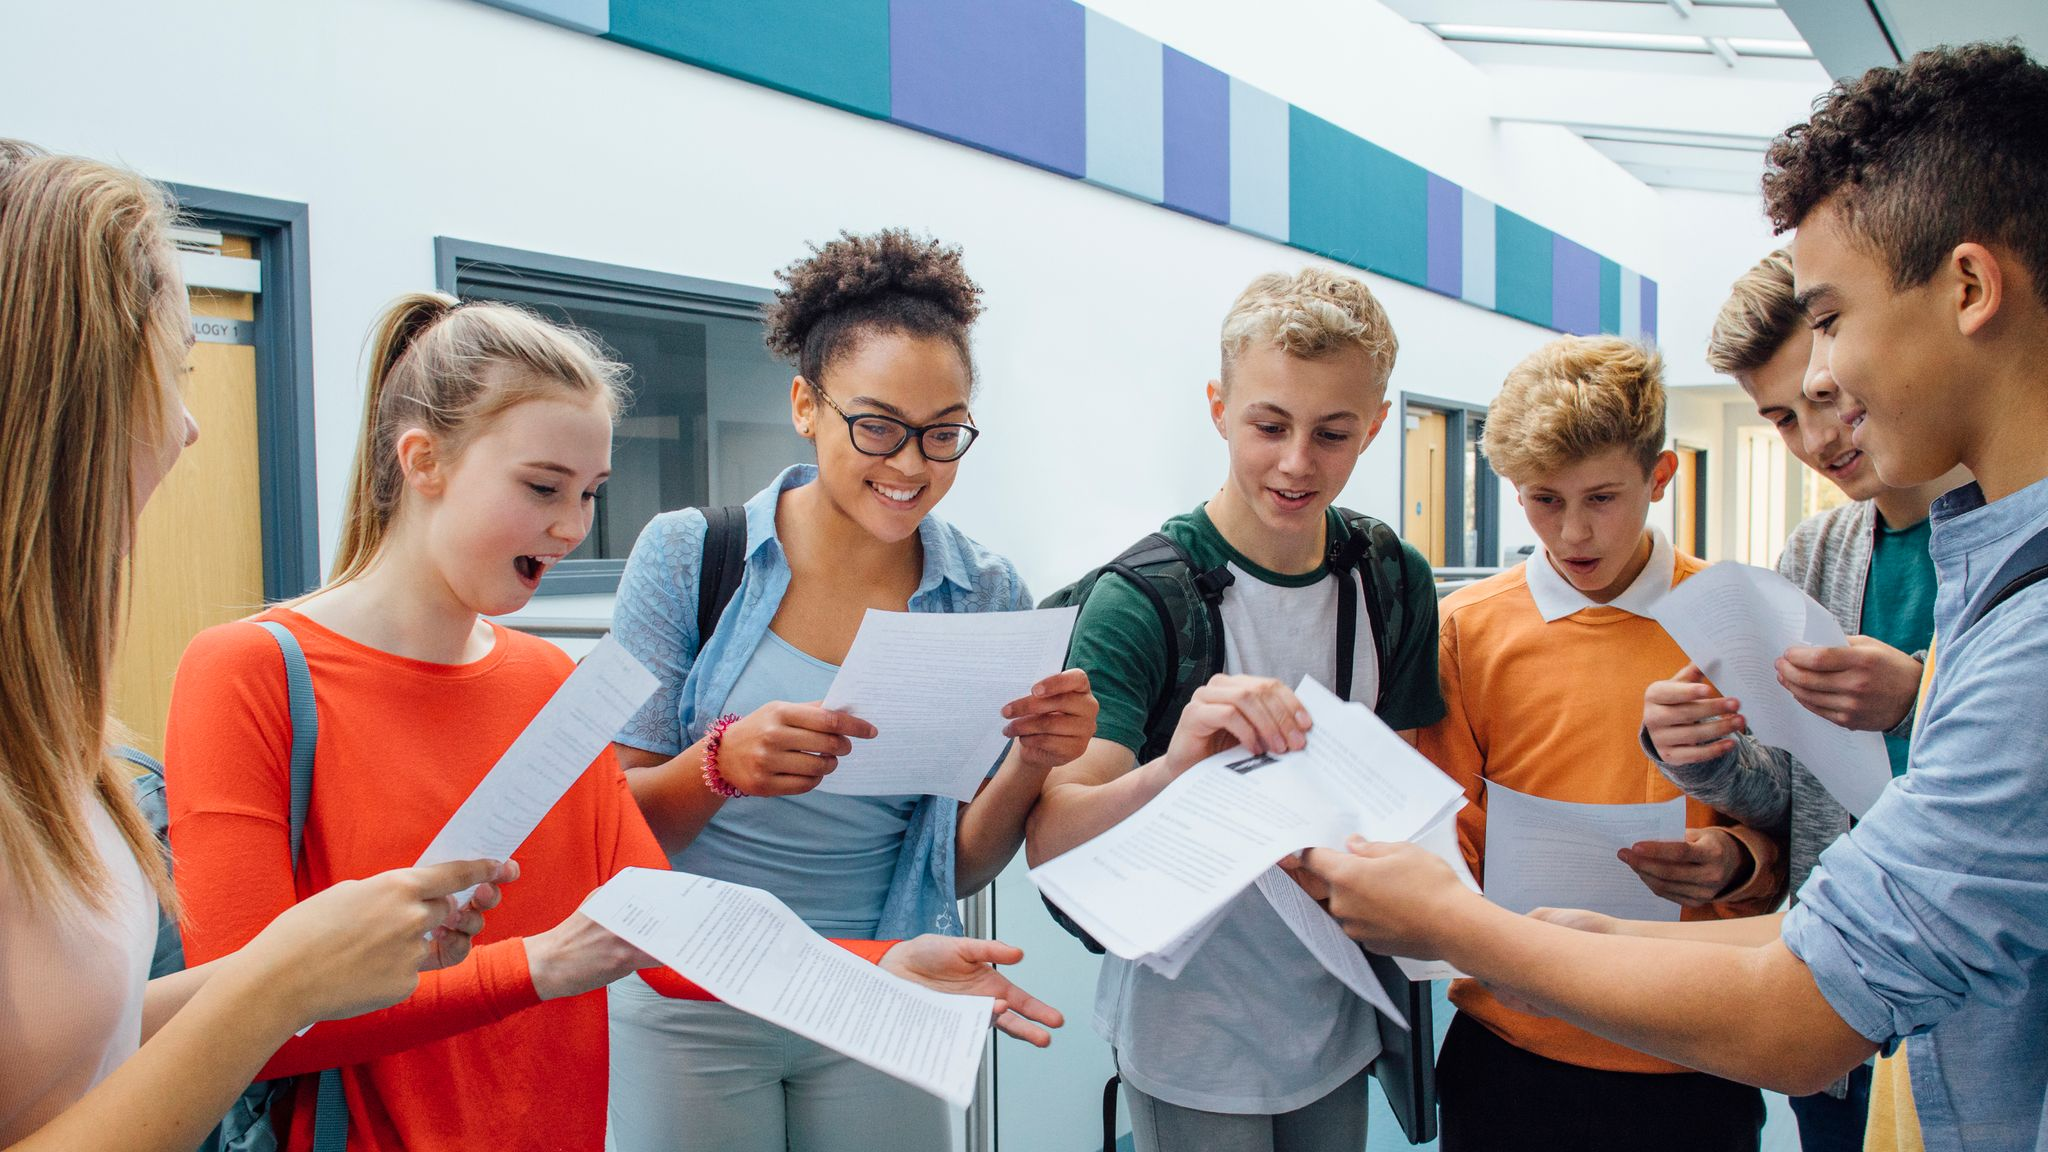

In [1]:
from IPython.display import Image
Image(filename='../input/studentpreformance/skynews-exams-stock_4388943.jpg', width="800", height='50')

<font size="+3" color="blue"><b>Table of Content</b></font>

#### <font color='blue'>1. Importing Library</font>
#### <font color='blue'>2. Reading the Dataset</font>
#### <font color='blue'>3. Data Visualization</font>
#### <font color='blue'>4. Detecting Outliers</font>
#### <font color='blue'>5. Data Preprocessing</font>
#### <font color='blue'>6. Data Modeling</font>

# <font color='purple'>Importing Library</font>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf 
  
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv
/kaggle/input/studentpreformance/skynews-exams-stock_4388943.jpg


## <font color='purple'> Loading Dataset</font>

In [3]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


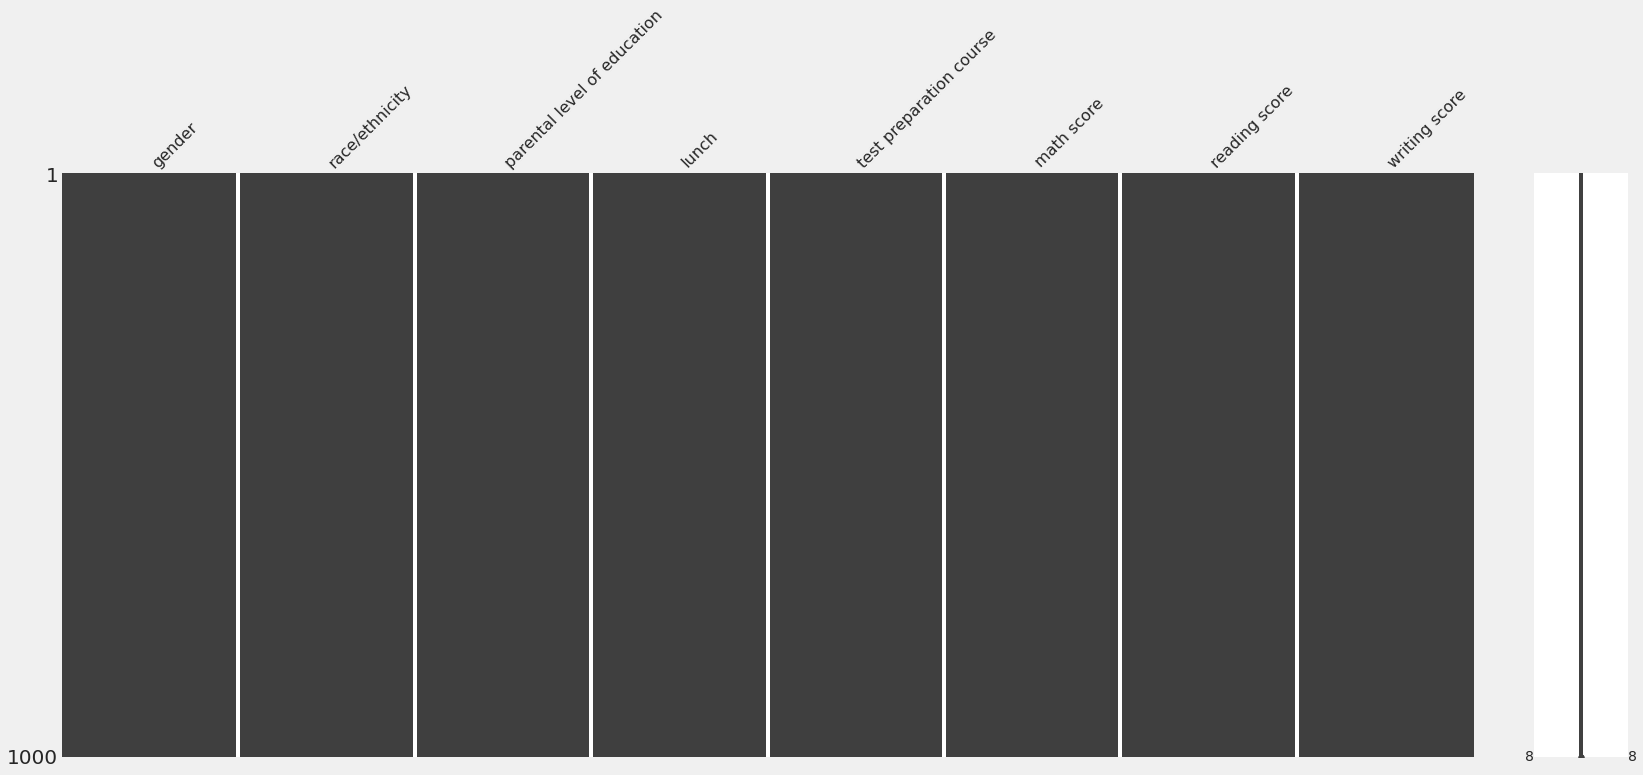

In [7]:
#### Visualizing the null values using missingo function

import missingno as msno
msno.matrix(data)

# <font color='purple'> Data Visualization </font>

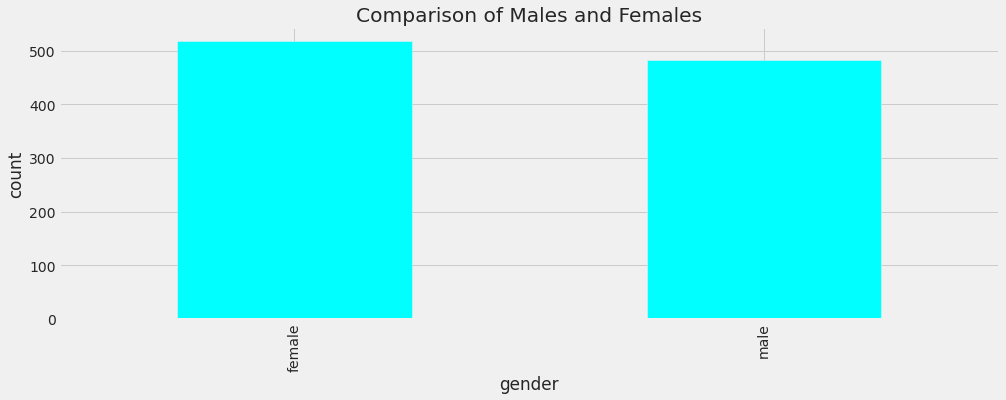

In [8]:
# visualising the number of male and female in the dataset
plt.subplots(figsize=(15,5))
data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [9]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

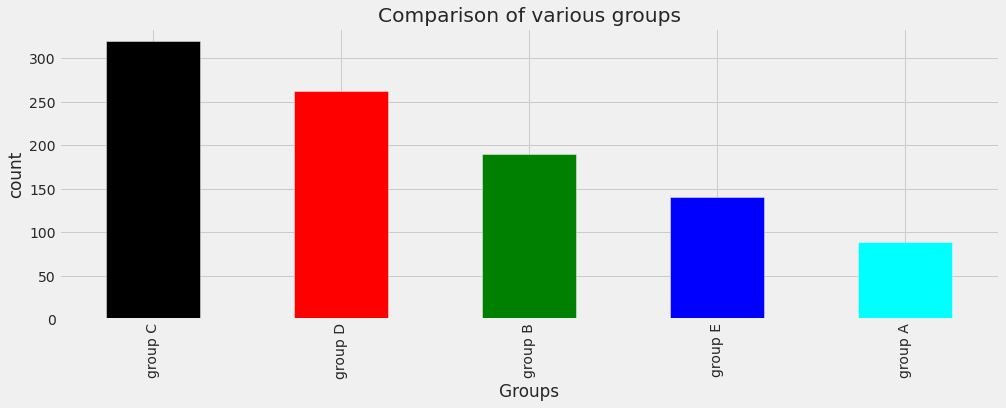

In [10]:
# visualizing the different groups in the dataset
plt.subplots(figsize=(15,5))
data['race/ethnicity'].value_counts(normalize = True)
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

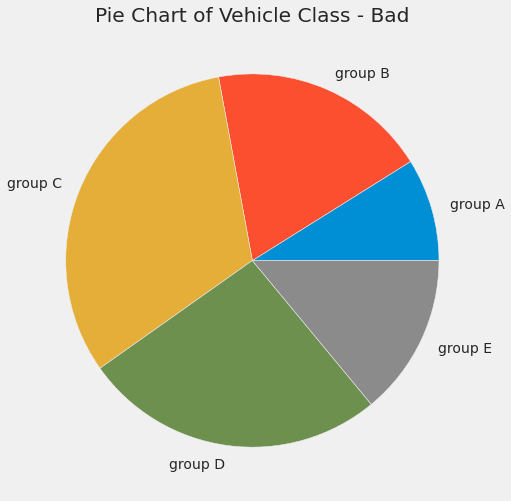

In [11]:
# Prepare Data
df = data.groupby('race/ethnicity').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

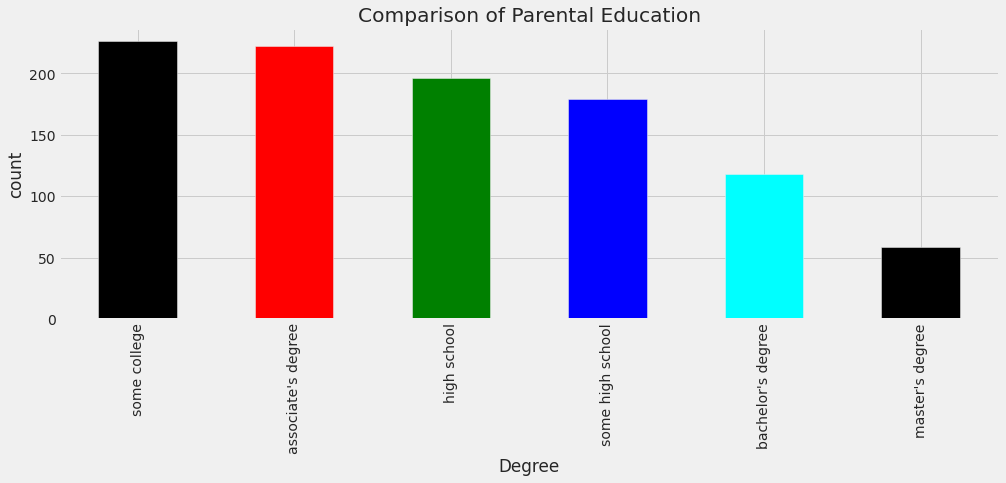

In [12]:
# visualizing the differnt parental education levels
plt.subplots(figsize=(15,5))
data['parental level of education'].value_counts(normalize = True)
data['parental level of education'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

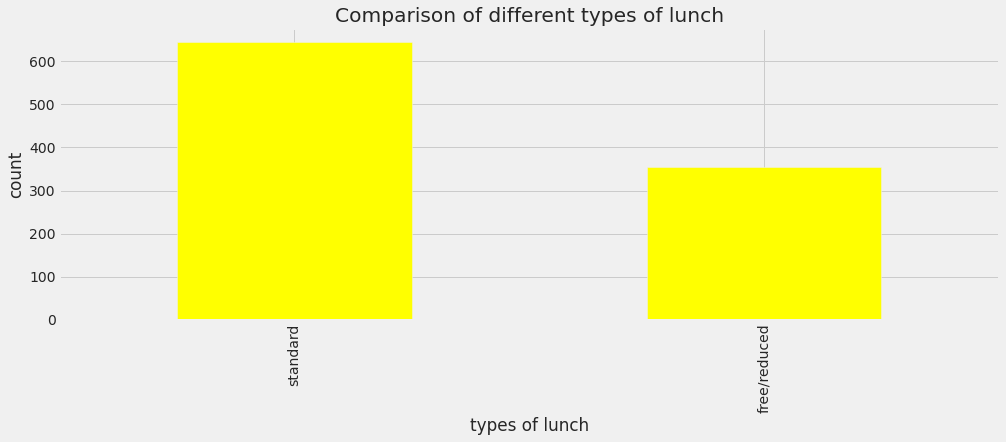

In [13]:
# visualizing different types of lunch 
plt.subplots(figsize=(15,5))
data['lunch'].value_counts(normalize = True)
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

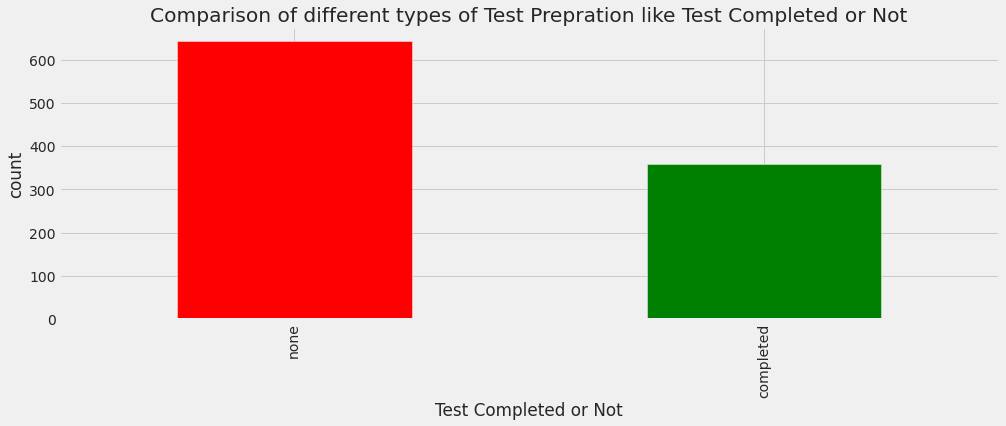

In [14]:
# visualizing different types of lunch 
plt.subplots(figsize=(15,5))
data['test preparation course'].value_counts(normalize = True)
data['test preparation course'].value_counts(dropna = False).plot.bar(color = ['red', 'green'])
plt.title('Comparison of different types of Test Prepration like Test Completed or Not')
plt.xlabel('Test Completed or Not')
plt.ylabel('count')
plt.show()

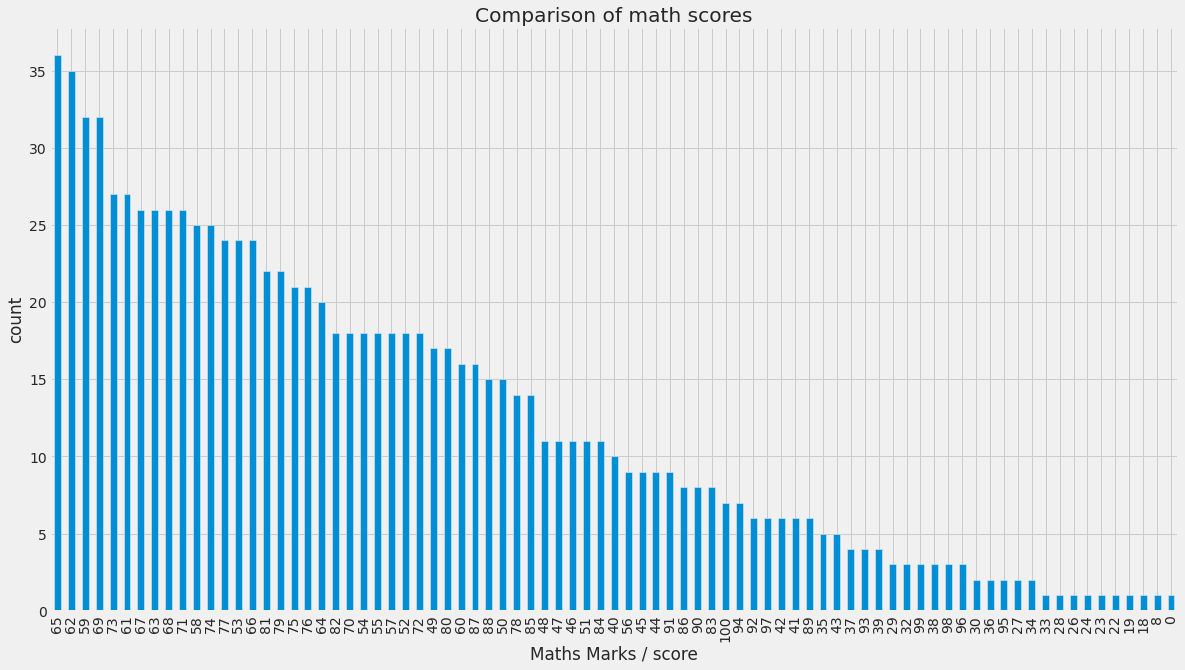

In [15]:
# visualizing maths score
plt.subplots(figsize=(15,5))
data['math score'].value_counts(normalize = True)
data['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('Maths Marks / score')
plt.ylabel('count')
plt.show()

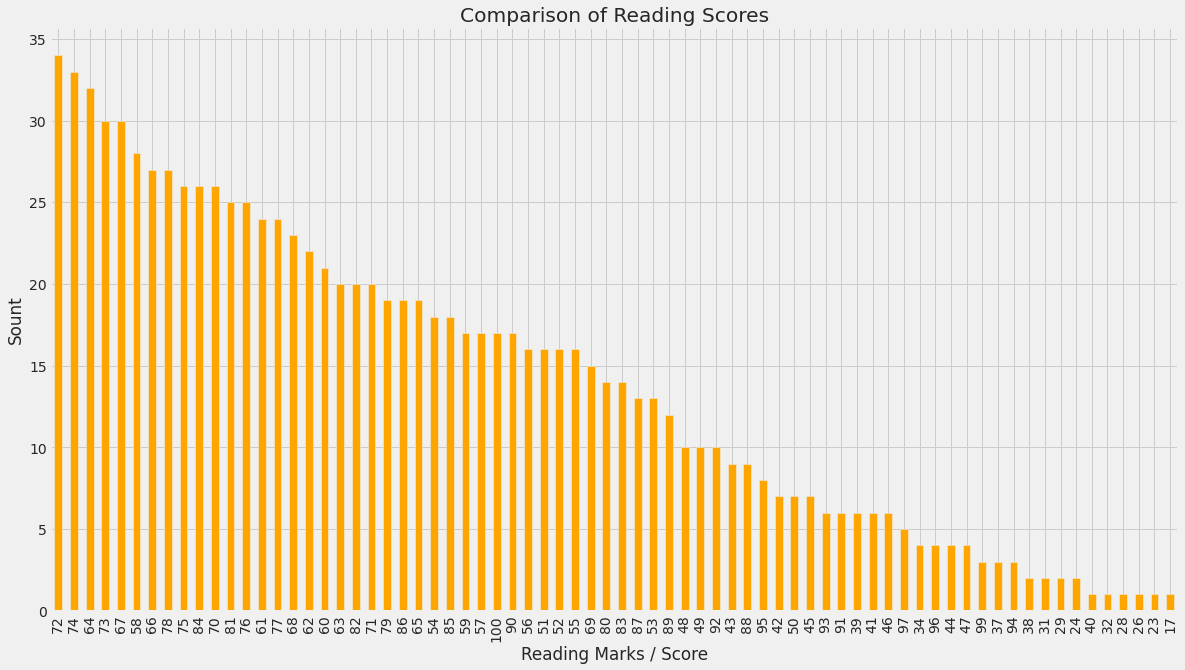

In [16]:
# visualizing reading score score
plt.subplots(figsize=(15,5))
data['reading score'].value_counts(normalize = True)
data['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of Reading Scores')
plt.xlabel('Reading Marks / Score')
plt.ylabel('Sount')
plt.show()

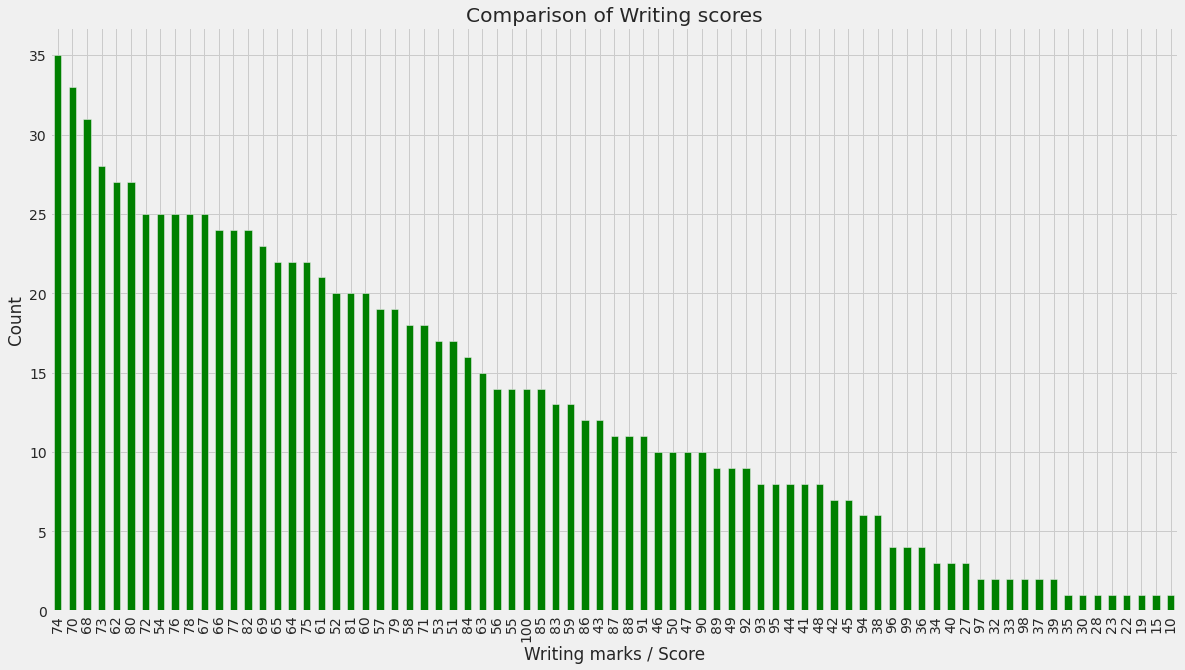

In [17]:
# visualizing writing score
plt.subplots(figsize=(15,5))
data['writing score'].value_counts(normalize = True)
data['writing score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'green')
plt.title('Comparison of Writing scores')
plt.xlabel('Writing marks / Score')
plt.ylabel('Count')
plt.show()

# <font color='purple'> Detecting Outliers </font>

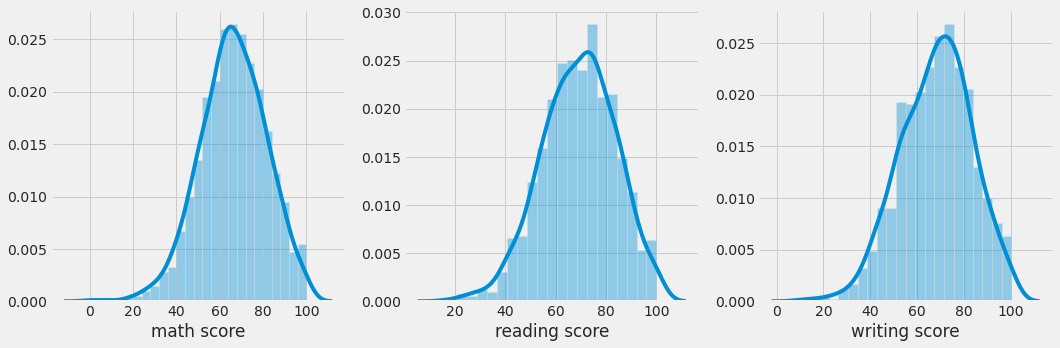

In [18]:
plt.figure(figsize = (16,5))
#sns.distplot(data['writing score'])

plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.show()

- It is very much clear, that there is no skewness in the Target Columns,

**Lets check the Inference**

In [19]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= data['math score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", data['math score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= data['reading score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", data['reading score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= data['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", data['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


**Let check the Confidence Interval for Math Score**

In [20]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['math score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['math score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


**Let check the Confidence Interval for Reading Score**

In [21]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['reading score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['reading score'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.75757337011645, 69.27642662988355)
True mean: 69.169


**Let check the Confidence Interval for Writing Score**

In [22]:
# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['writing score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['writing score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.59660035030862, 69.17739964969138)
True mean: 68.054


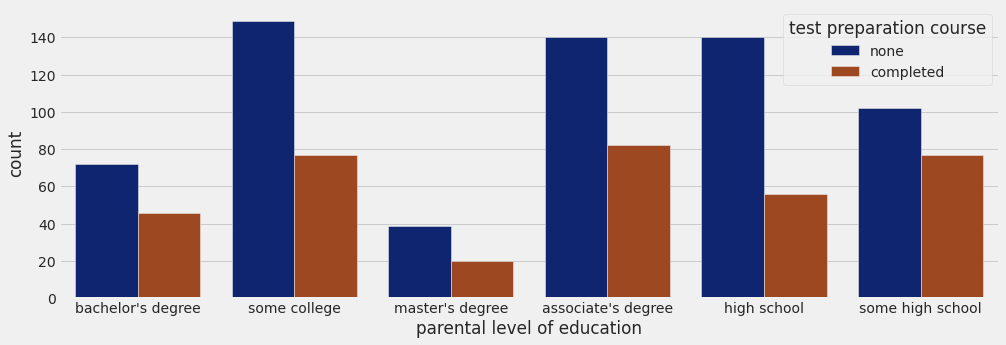

In [23]:
# comparison of parental degree and test course
plt.subplots(figsize=(15,5))
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.show()

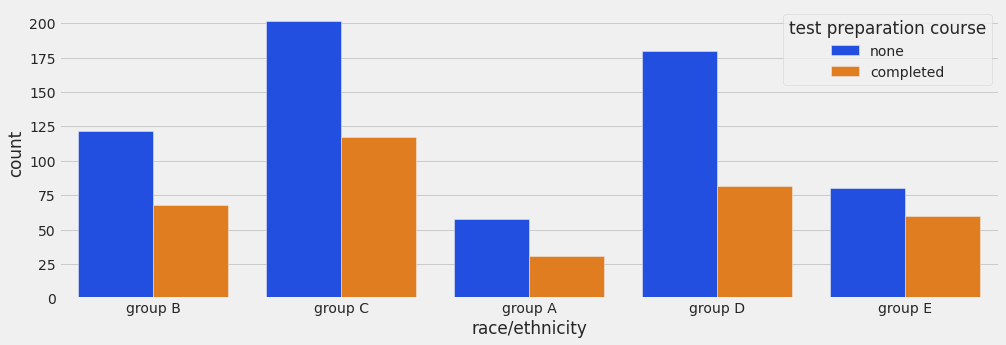

In [24]:
# comparison of race/ethnicity and test preparation course
plt.subplots(figsize=(15,5))
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.show()


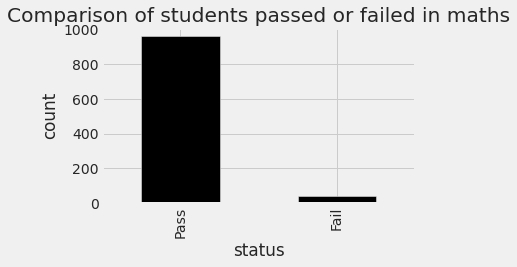

In [25]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
plt.subplots(figsize=(15,8))
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

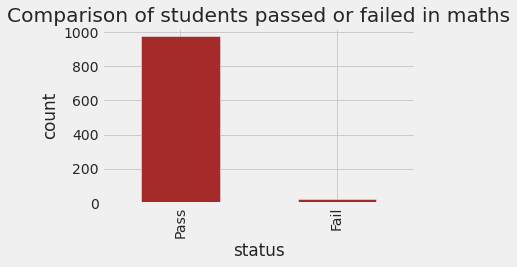

In [26]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

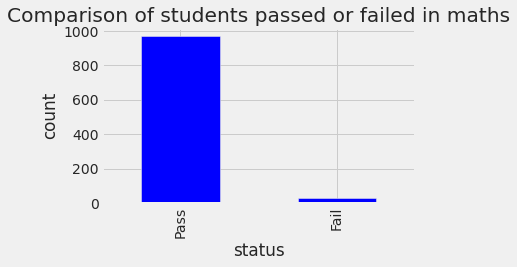

In [27]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

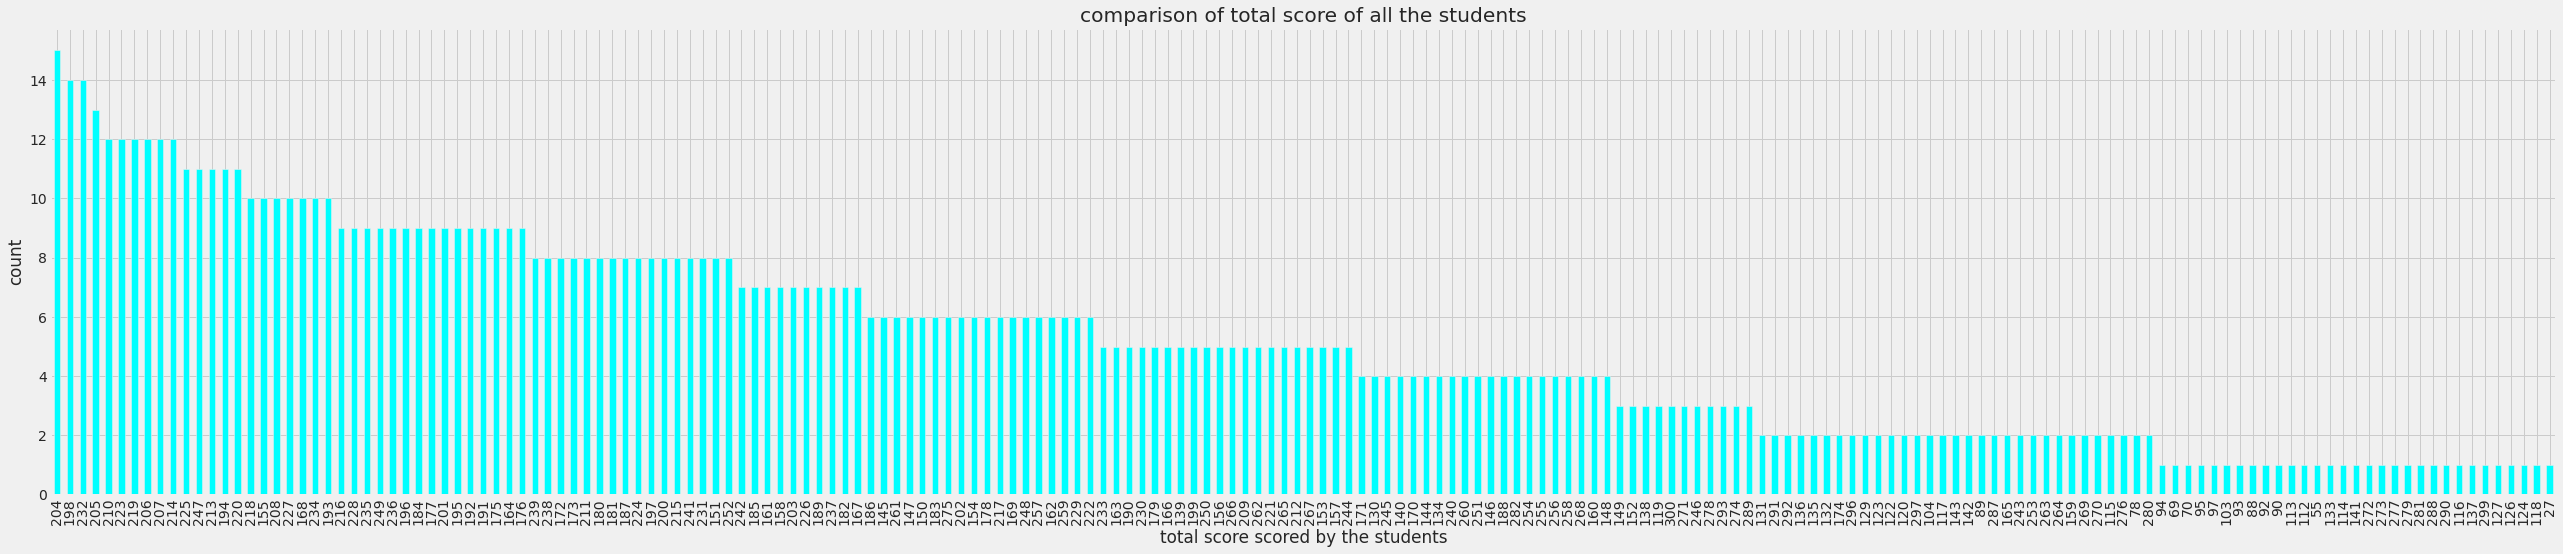

In [28]:
# computing the total score for each student
plt.subplots(figsize=(15,8))
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

data['total_score'].value_counts(normalize = True)
data['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

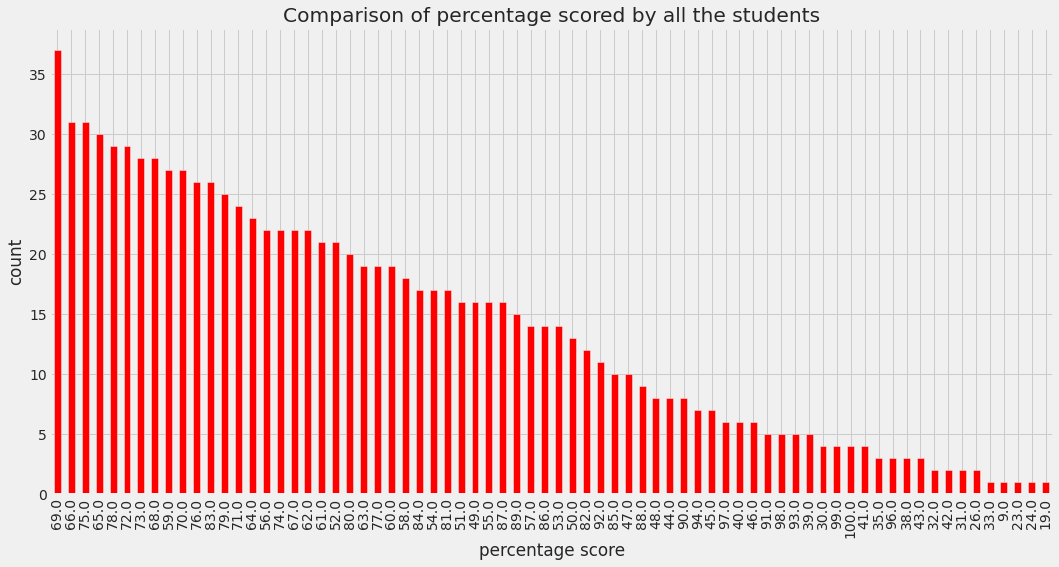

In [29]:
# computing percentage for each of the students
# importing math library to use ceil
from math import * 

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
  data['percentage'][i] = ceil(data['percentage'][i])

data['percentage'].value_counts(normalize = True)
data['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

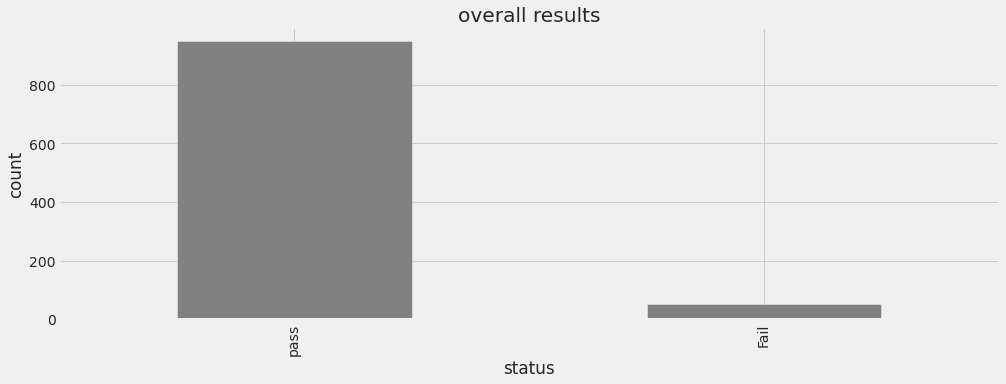

In [30]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (15, 5))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

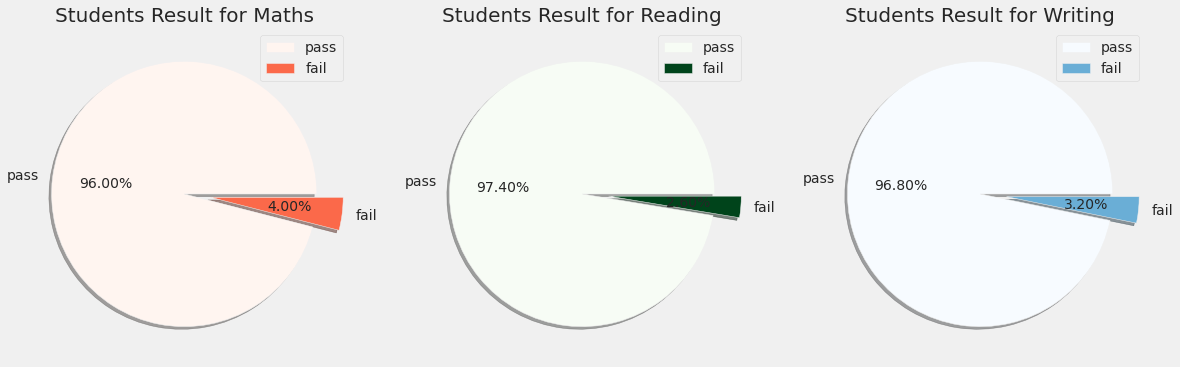

In [31]:
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (18, 12)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

In [32]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

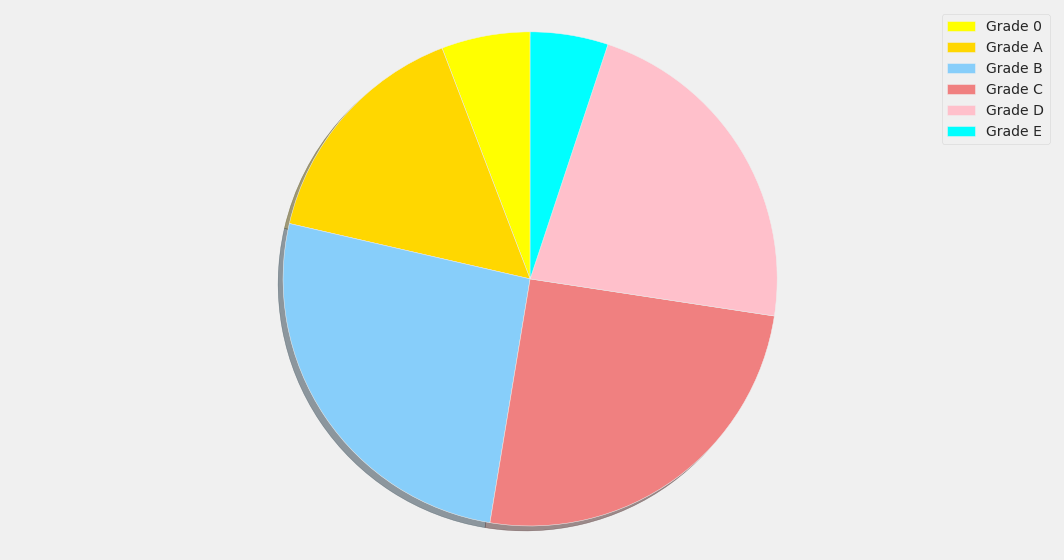

In [33]:
# plotting a pie chart for the distribution of various grades amongst the students


plt.subplots(figsize=(15,8))
labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

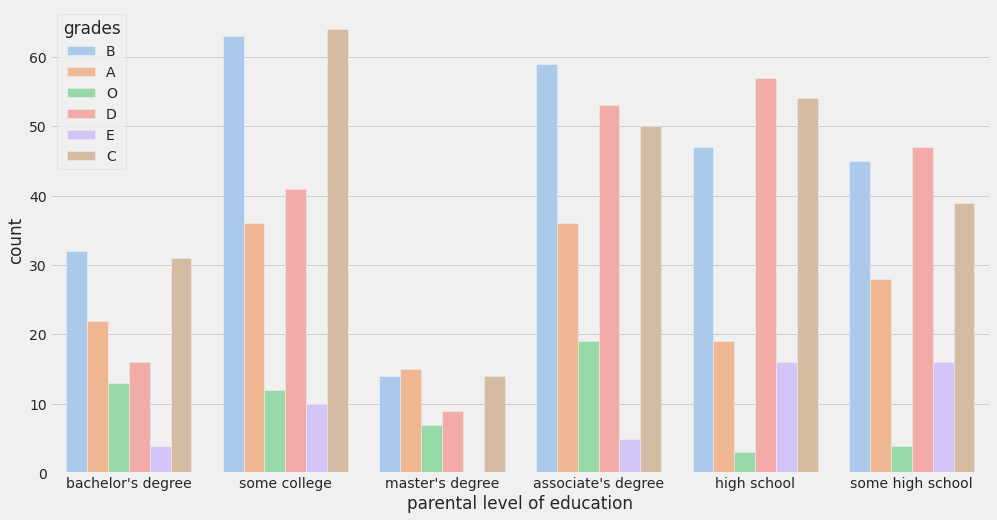

In [34]:
# for better visualization we will plot it again using seaborn
plt.subplots(figsize=(15,8))
sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.show()

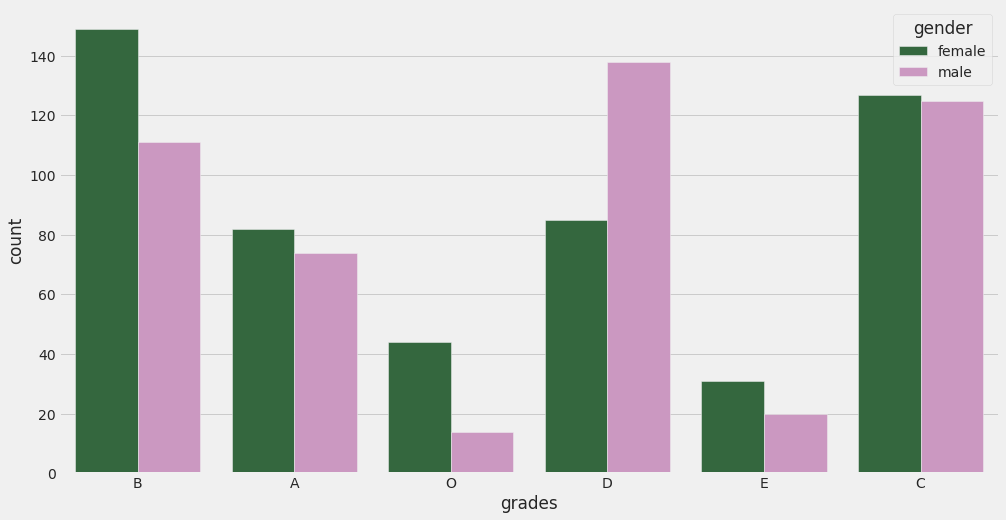

In [35]:
# comparing the distribution of grades among males and females
plt.subplots(figsize=(15,8))
sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

Text(0.5, 1.0, 'Correlations between the attributes')

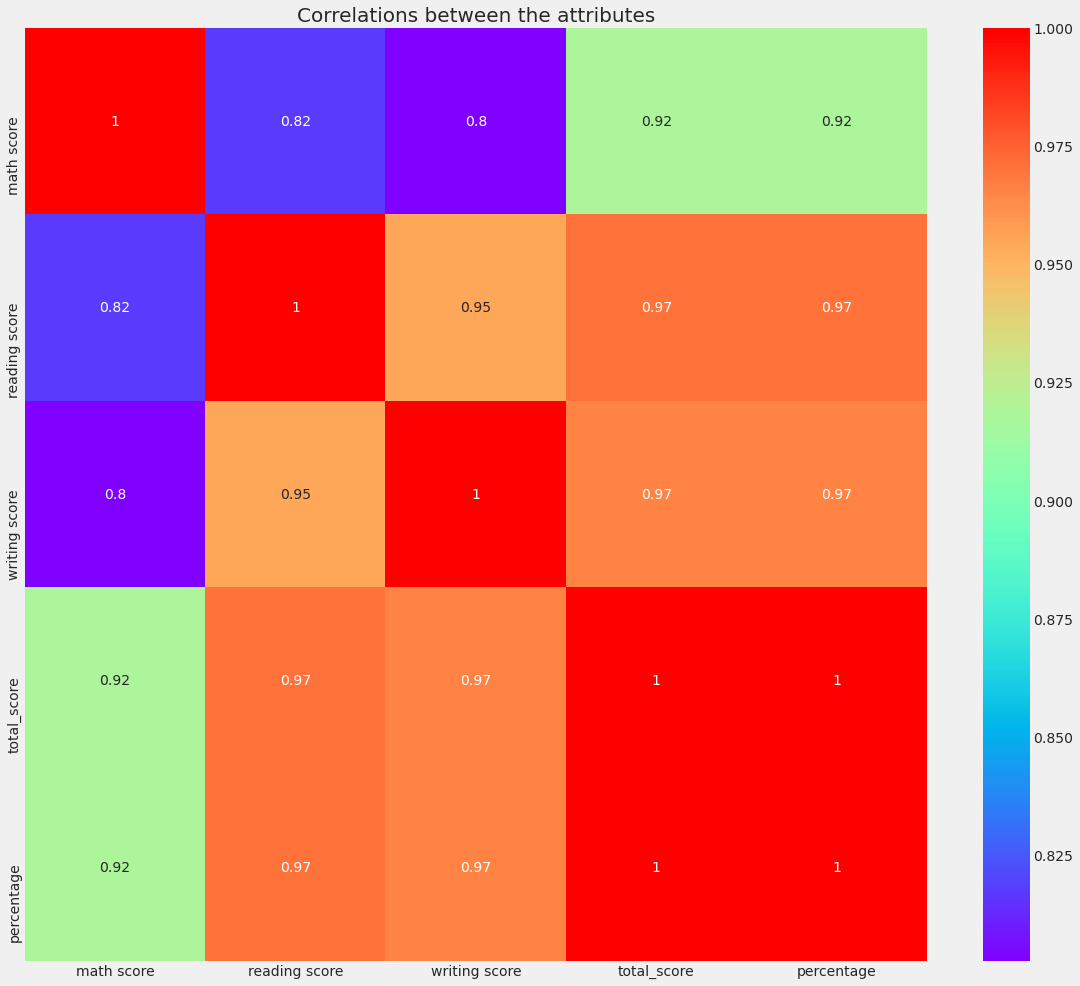

In [36]:
# heatmap

plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(data.corr(), cmap = 'rainbow', annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

In [37]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,pass,B


# <font color='purple'> Data Preprocessing</font>

In [38]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch

data['lunch'] = le.fit_transform(data['lunch'])

In [39]:
# label encoding for race/ethnicity
# we have to map values to each of the categories

data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [40]:
# label encoding for parental level of education

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [41]:
# label encoding for gender

data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading

data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing

data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status

data['status'] = le.fit_transform(data['status'])

In [42]:
# label encoding for grades
# we have to map values to each of the categories

data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [43]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [44]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [45]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# <font color='purple'> Modeling </font>

### <font color='purple'> Random Forest Classifier Algorithm</font>

In [46]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


### <font color='purple'> Confustion Matrix</font>

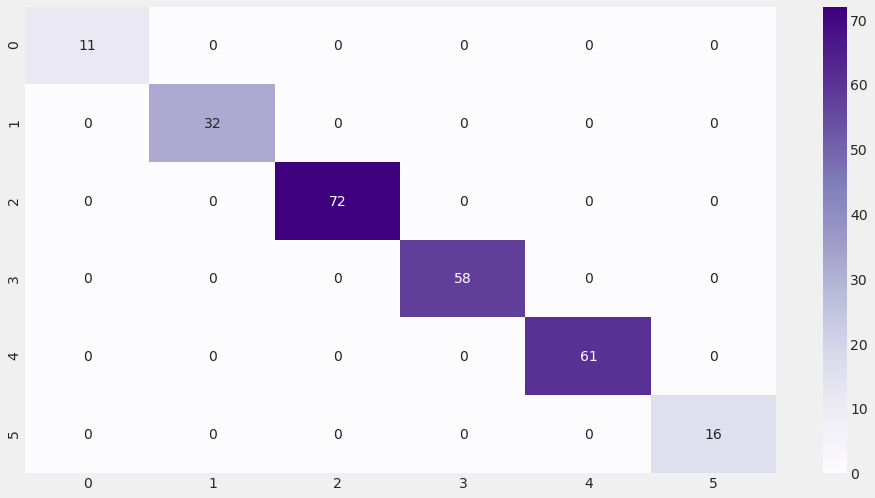

In [47]:
# printing the confusion matrix
plt.subplots(figsize=(15,8))
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Purples')

### <font color='purple'> Classification Report</font>

In [48]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        16

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [49]:
## Reference

### https://www.kaggle.com/roshansharma/student-performance-analysis
### https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified

### If these kernels impress you,give them an <font size="+2" color="red"><b>Upvote</b></font>.<br>

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>